In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import coreset, qaoa

np.random.seed()

In [2]:
data_vectors = np.load('Datasets/val2017_data_vectors.npy')
data_vectors = data_vectors - np.mean(data_vectors, axis=0)
np.random.shuffle(data_vectors)

In [3]:
np.save('Datasets/synthetic_data_vectors.npy', data_vectors)

In [4]:
B = coreset.get_bestB(data_vectors, num_runs=10, k=4)

cost_whole = coreset.kmeans_cost(data_vectors, coreset_vectors=data_vectors)
print('cost_whole is %s' % cost_whole)

# random sampling "coreset":
random_sample_5_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=5)] for _ in range(10)]
random_sample_10_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=10)] for _ in range(10)]
random_sample_20_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=20)] for _ in range(10)]
random_sample_40_list = [[data_vectors[i] for i in np.random.choice(len(data_vectors), size=40)] for _ in range(10)]
cost_5_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_5_list[i]) for i in range(10)]
cost_10_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_10_list[i]) for i in range(10)]
cost_20_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_20_list[i]) for i in range(10)]
cost_40_random_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=random_sample_40_list[i]) for i in range(10)]
print('min cost_{5, 10, 20, 40}_random_list is %s, %s, %s, %s' % (
    np.min(cost_5_random_list), np.min(cost_10_random_list), np.min(cost_20_random_list), np.min(cost_40_random_list)))

# actual coreset:
coreset_vectors_5_list, coreset_weights_5_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_5_list[i], coreset_weights_5_list[i] = coreset.BFL16(data_vectors, B=B, m=5)

coreset_vectors_10_list, coreset_weights_10_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_10_list[i], coreset_weights_10_list[i] = coreset.BFL16(data_vectors, B=B, m=10)
    
coreset_vectors_20_list, coreset_weights_20_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_20_list[i], coreset_weights_20_list[i] = coreset.BFL16(data_vectors, B=B, m=20)

coreset_vectors_40_list, coreset_weights_40_list = [None] * 10, [None] * 10
for i in range(10):
    coreset_vectors_40_list[i], coreset_weights_40_list[i] = coreset.BFL16(data_vectors, B=B, m=40)

cost_5_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_5_list[i], sample_weight=coreset_weights_5_list[i]) for i in range(10)]
cost_10_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_10_list[i], sample_weight=coreset_weights_10_list[i]) for i in range(10)]
cost_20_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_20_list[i], sample_weight=coreset_weights_20_list[i]) for i in range(10)]
cost_40_coreset_list = [coreset.kmeans_cost(data_vectors, coreset_vectors=coreset_vectors_40_list[i], sample_weight=coreset_weights_40_list[i]) for i in range(10)]
print('min cost_{5, 10, 20, 40}_coreset_list is %s, %s, %s, %s' % (
    np.min(cost_5_coreset_list), np.min(cost_10_coreset_list), np.min(cost_20_coreset_list), np.min(cost_40_coreset_list)))

best_index = cost_5_coreset_list.index(np.min(cost_5_coreset_list))
best_coreset_vectors = coreset_vectors_5_list[best_index]
best_coreset_weights = coreset_weights_5_list[best_index]
print('\nzeroth order for m=5 coreset:')
qaoa_bound_zero_5 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=0)

best_index = cost_10_coreset_list.index(np.min(cost_10_coreset_list))
best_coreset_vectors = coreset_vectors_10_list[best_index]
best_coreset_weights = coreset_weights_10_list[best_index]

print('\nzeroth order for m=10 coreset:')
qaoa_bound_zero_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=0)

print('\nfirst order for m=10 coreset:')
qaoa_bound_first_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=1)

print('\nsecond order for m=10 coreset:')
qaoa_bound_second_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order=2)

print('\ninfinite order for m=10 coreset:')
qaoa_bound_inf_10 = qaoa.qaoa_bound(best_coreset_vectors, best_coreset_weights, data_vectors, taylor_order='inf')

cost_whole is 1763716.1027350863
min cost_{5, 10, 20, 40}_random_list is 2217229.1745919483, 2014685.748134426, 1928237.3839368946, 1856804.6715134718
min cost_{5, 10, 20, 40}_coreset_list is 2209519.83158444, 2046346.9959484078, 1949364.8389131417, 1862698.500778985

zeroth order for m=5 coreset:
2315869.769814263 (1, -1, -1, 1, 1) 2.2634106847935653 1756679557.1195555
2208108.817284802 (-1, -1, -1, -1, 1) 0.19980346832562237 2509314190.3749657
2367664.4215593757 (1, -1, 1, -1, 1) 1.6596367097727587 2369944081.9494805
2323864.4314886015 (1, -1, -1, -1, 1) 0.7557370748959414 2599887632.988952
2363954.8009623704 (1, 1, -1, 1, -1) 1.7770038774630885 2473482086.910102

zeroth order for m=10 coreset:
2137516.9260602766 (1, -1, 1, -1, 1, 1, 1, -1, -1, 1) 1.8859965651047321 931289692.37416
2116702.5707953926 (1, 1, -1, -1, 1, -1, 1, -1, 1, -1) 1.247921587824637 1023225575.8104318
2128358.5495936996 (1, 1, 1, -1, 1, 1, -1, 1, -1, 1) 2.228020570865372 1035565765.129009
2118555.703998709 (1, 1,

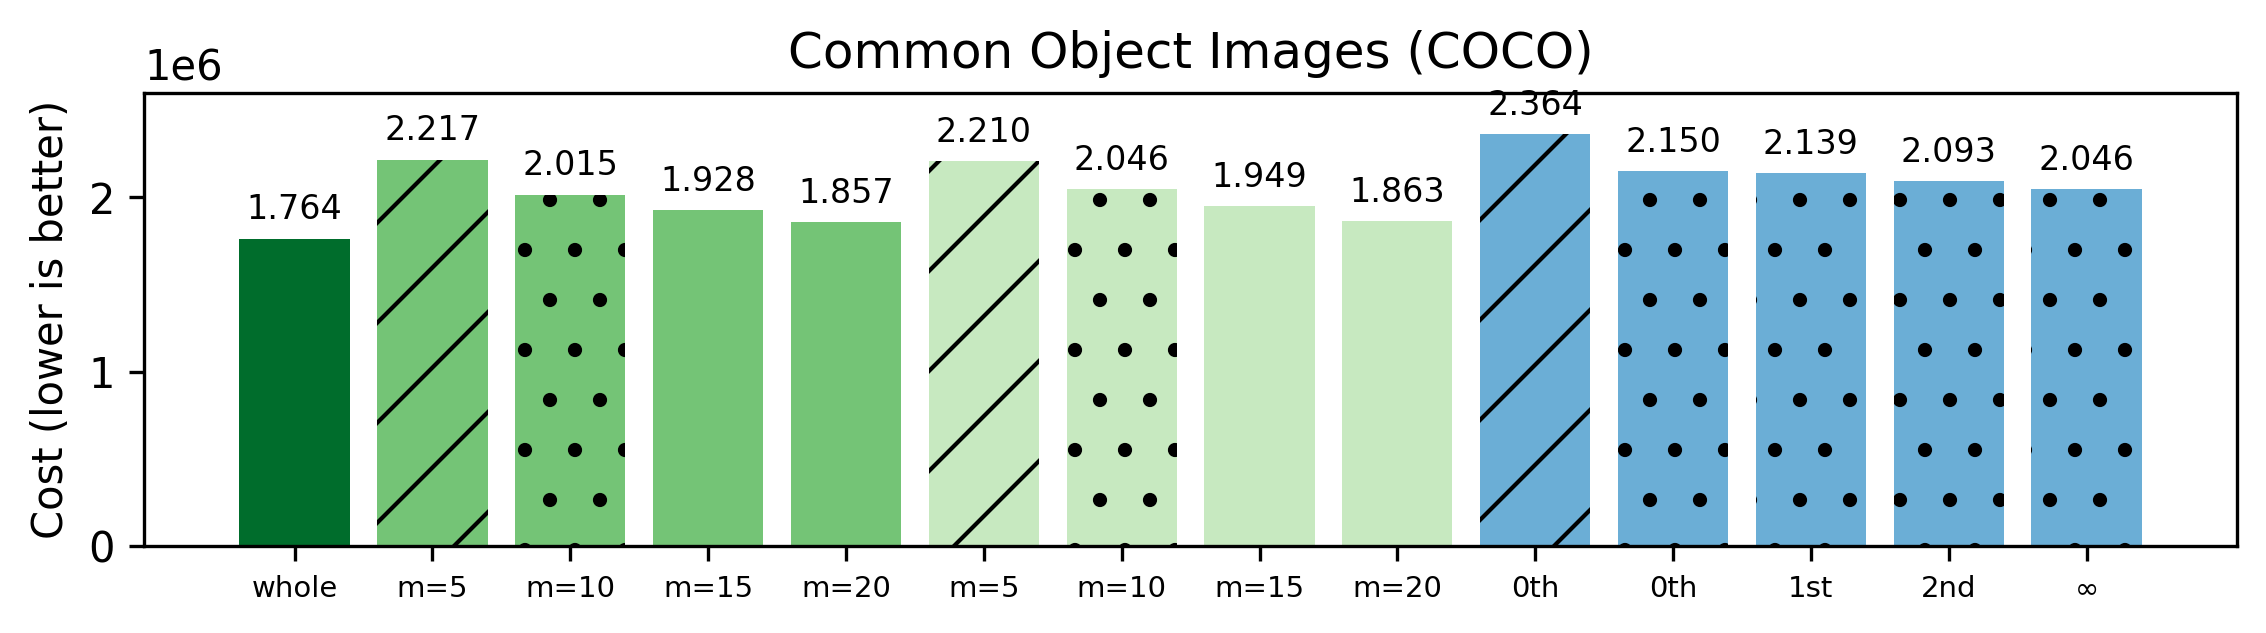

In [8]:
x = np.arange(14)
costs = [cost_whole, np.min(cost_5_random_list), np.min(cost_10_random_list), np.min(cost_20_random_list), np.min(cost_40_random_list),
         np.min(cost_5_coreset_list), np.min(cost_10_coreset_list), np.min(cost_20_coreset_list), np.min(cost_40_coreset_list),
         qaoa_bound_zero_5, qaoa_bound_zero_10, qaoa_bound_first_10, qaoa_bound_second_10, qaoa_bound_inf_10]
scale = np.floor(np.log10(max(costs)))

labels = ['whole', 'm=5', 'm=10', 'm=15', 'm=20', 'm=5', 'm=10', 'm=15', 'm=20', '0th', '0th', '1st', '2nd', u"\u221E"]
color = ['#006d2c', '#74c476', '#74c476', '#74c476', '#74c476', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#6baed6', '#6baed6', '#6baed6', '#6baed6', '#6baed6']
hatch=['', '/', '.', '', '', '/', '.', '', '', '/', '.', '.', '.', '.']
# plt.bar(x, costs, yerr=yerr, color=color, hatch=hatch)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height() / (10 ** scale)
        ax.annotate('{0:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height * (10 ** scale)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)


fig, ax = plt.subplots(figsize=(9, 2), dpi=300)
for i in range(len(x)):
    rects = ax.bar(x[i], costs[i], label=labels[i], color=color[i], hatch=hatch[i]) # , yerr=[[yerr[0][i]], [yerr[1][i]]])
    autolabel(rects)
    
ax.set_ylim([0,2.6e6])
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=7)
ax.set_ylabel('Cost (lower is better)')
ax.set_title('Common Object Images (COCO)')

plt.savefig('../Electronics_Submission/val2017.pdf')

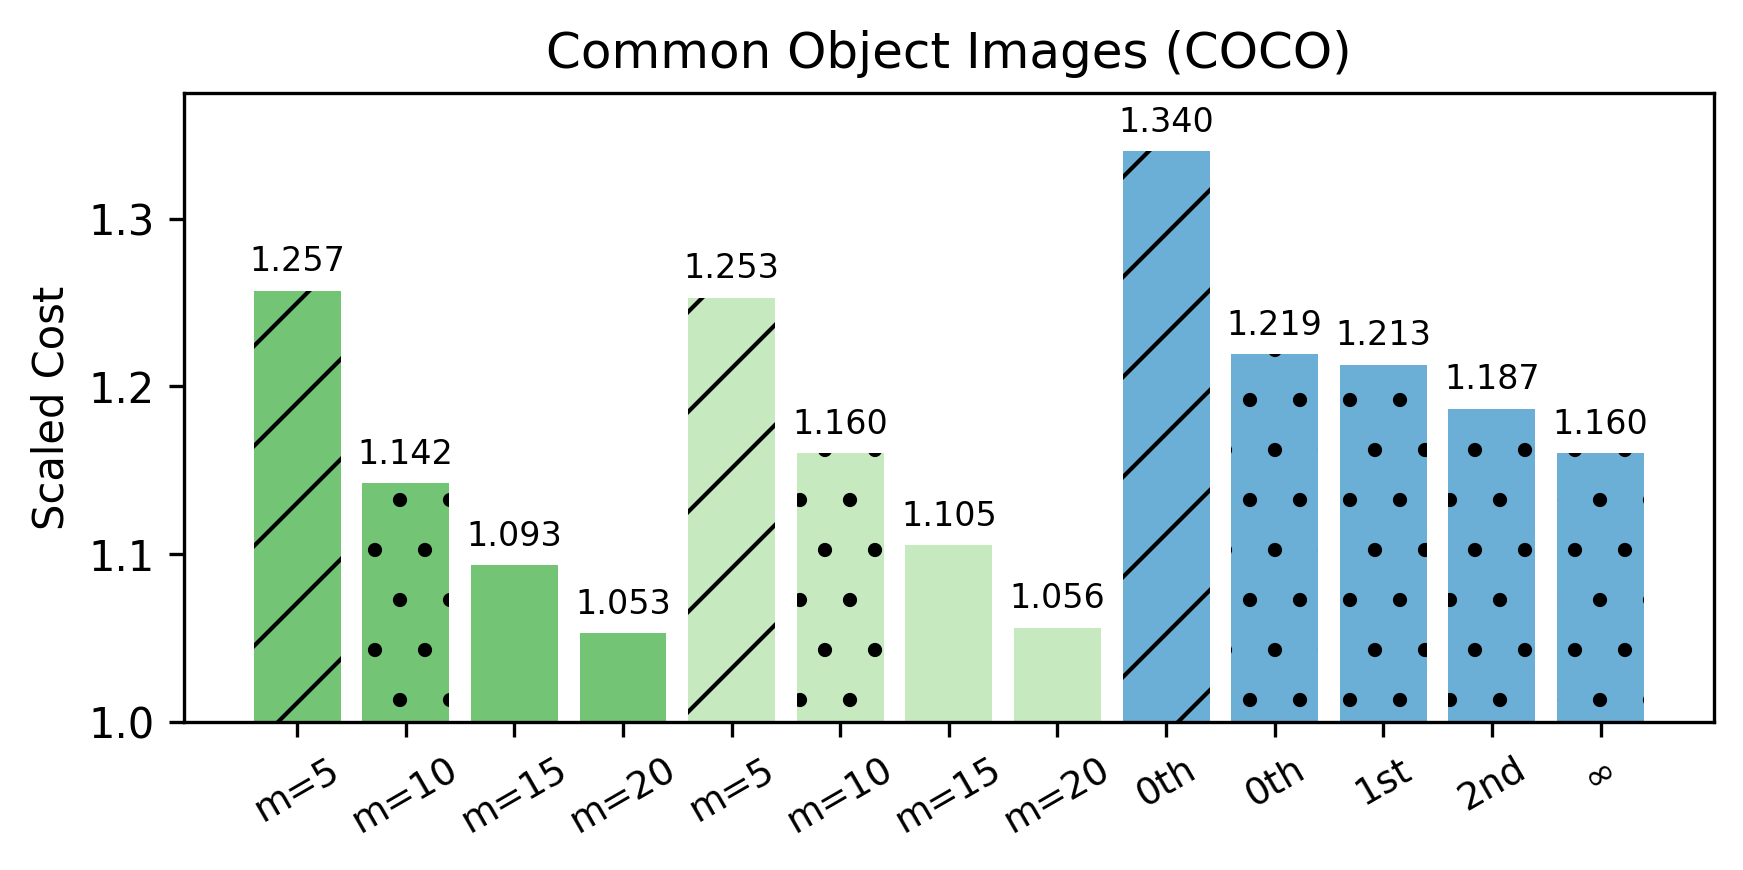

In [14]:
x = np.arange(13)
costs = [np.min(cost_5_random_list), np.min(cost_10_random_list), np.min(cost_20_random_list), np.min(cost_40_random_list),
         np.min(cost_5_coreset_list), np.min(cost_10_coreset_list), np.min(cost_20_coreset_list), np.min(cost_40_coreset_list),
         qaoa_bound_zero_5, qaoa_bound_zero_10, qaoa_bound_first_10, qaoa_bound_second_10, qaoa_bound_inf_10]
scaled_costs = [c / cost_whole for c in costs]
#scale = np.floor(np.log10(max(costs)))

labels = ['m=5', 'm=10', 'm=15', 'm=20', 'm=5', 'm=10', 'm=15', 'm=20', '0th', '0th', '1st', '2nd', u"\u221E"]
color = ['#74c476', '#74c476', '#74c476', '#74c476', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#c7e9c0', '#6baed6', '#6baed6', '#6baed6', '#6baed6', '#6baed6']
hatch=['/', '.', '', '', '/', '.', '', '', '/', '.', '.', '.', '.']
# plt.bar(x, costs, yerr=yerr, color=color, hatch=hatch)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()# / (10 ** scale)
        ax.annotate('{0:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),# * (10 ** scale)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)


fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
for i in range(len(x)):
    rects = ax.bar(x[i], scaled_costs[i], label=labels[i], color=color[i], hatch=hatch[i]) # , yerr=[[yerr[0][i]], [yerr[1][i]]])
    autolabel(rects)
    
ax.set_ylim([1,1.375])
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=9, rotation=30)
ax.set_ylabel('Scaled Cost')
ax.set_title('Common Object Images (COCO)')
plt.tight_layout()
plt.savefig('../Electronics_Submission/scaled_val2017.pdf')

In [5]:
best_index = cost_5_coreset_list.index(np.min(cost_5_coreset_list))
np.save('val2017_coreset_vectors.npy', coreset_vectors_5_list[best_index])
np.save('val2017_coreset_weights.npy', coreset_weights_5_list[best_index])